
Basic example
------------------
A small example script showing the usage of the AnyForm transformation.
for ordinary kriging on a sphere.

In [1]:
import sys
sys.path.append(r'/home/user/.qgis2/python/plugins/AnyForm/')

In [2]:
%matplotlib inline

from anisotroPy import basegrid, basepath, transformation
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import numpy as np
import scipy.interpolate
import pandas as pd

In [3]:
reload(basepath)
reload(transformation)

<module 'anisotroPy.transformation' from '/home/user/.qgis2/python/plugins/AnyForm/anisotroPy/transformation.pyc'>

In [4]:
# Make this example reproducible:
np.random.seed(89239413)

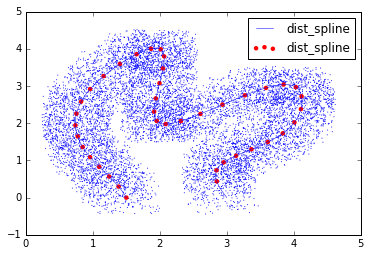

In [15]:
x = np.array([ 1.5,  1.,  1.,  2.,  2.,  4.,  4.,  3., 3.])
y = np.array([ 0.,  1.,  3.,  4.,  2.,  3.,  2.,  1., 0.])

t = np.zeros(x.shape)
t[1:] = np.sqrt((x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2)
t = np.cumsum(t)
t /= t[-1]
nt = np.linspace(0, 1, 10000)
x1 = scipy.interpolate.spline(t, x, nt)
y1 = scipy.interpolate.spline(t, y, nt)
plt.plot(x1, y1, label='dist_spline',lw=0.5)



random_x = np.random.random(len(x1))
random_y = np.random.random(len(y1))

plt.scatter(x1+random_x-0.5,y1+random_y-0.5,s=1,edgecolors='none')
plt.scatter(x1[::250], y1[::250], label='dist_spline', c = 'r',edgecolors='none')
plt.legend(loc='best')
plt.show()

In [21]:
grid = zip(x1+random_x-0.5,y1+random_y-0.5)

In [38]:
path = zip(x1[::40],y1[::40])

Avarage interval between path points:
0.0501023763602
bc calculated successfully
vbc calculated successfully
0:00:00.000027
 calculate_bp
0:00:00.069801
 calculate_vbp
0:00:05.932158
 calculate_pbc
0:00:11.164502
 calculate_pto
0:00:15.602166
 set_index_correlation
0:00:16.663849
 set_pto
0:00:16.711803
 set_position
0:00:17.096720
 set_d
0:00:17.142813
 set_s
0:00:17.244429


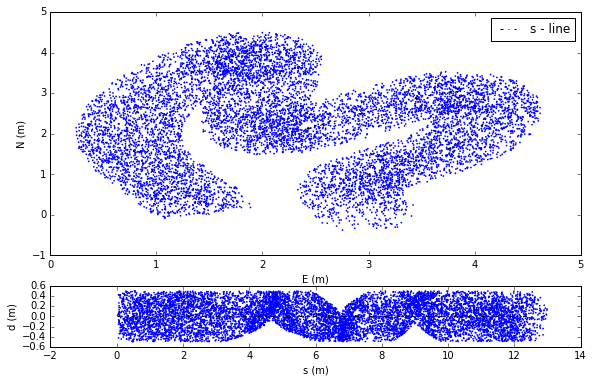

0:00:17.883982


In [39]:
#   Create basepath object and load data from a dataframe.
bp  = basepath.Basepath()
bp.basepath = pd.DataFrame()
bp.basepath['E'] = zip(*path)[0]
bp.basepath['N'] = zip(*path)[1]
#   Calculate the s distances from the origin,
#   the bc distance between every consecutive points
#   and the vector between bc
bp.calculate_s()
bp.calculate_bc()
bp.calculate_vbc()
#   Create basegrid object and load data from a csv file.
bg  = basegrid.Basegrid()
bg.basegrid = pd.DataFrame()
bg.basegrid['E'] = zip(*grid)[0]
bg.basegrid['N'] = zip(*grid)[1]
#   Create transformation object, with default configuration
#   and with the basepath and basegrid objects.
trg = transformation.Transformation(bp, bg, msp=0.5, st = 0.0001)
#   Perform the transformation.
trg.run()
#   Save the transformed basegrid to a csv file.
#bg.basegrid.to_csv('bathymetry_out.csv', sep='\s')

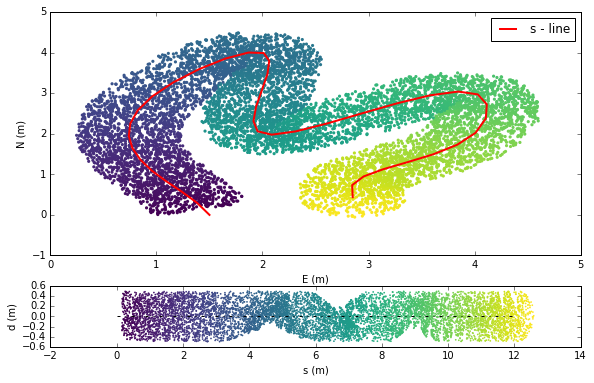

In [36]:
import matplotlib.gridspec as gridspec

def plot_width(df,buff=100):
    return (df.d.astype('float')>-buff)&(df.d.astype('float')<buff)

fig = plt.figure(figsize=(9.5,6))
gs = gridspec.GridSpec(2,1,height_ratios=[4,1])

ax0 = plt.subplot(gs[0])
p0 = plt.scatter(
                bg.basegrid.E[plot_width(bg.basegrid)].tolist(),
                bg.basegrid.N[plot_width(bg.basegrid)].tolist(),
                c = bg.basegrid.s[plot_width(bg.basegrid)].tolist(),
                cmap='viridis',
                s=10,
                edgecolors='none',
                )
p01 = plt.plot(
                bp.basepath.E,
                bp.basepath.N,
                'red',
                ls='-',
                lw=2,
                label='s - line')
plt.legend()
ax0.set_xlabel('E (m)')
ax0.set_ylabel('N (m)')

ax1 = plt.subplot(gs[1])
p0 = plt.scatter(
                bg.basegrid.s[plot_width(bg.basegrid)].tolist(),
                bg.basegrid.d[plot_width(bg.basegrid)].tolist(),
                c = bg.basegrid.s[plot_width(bg.basegrid)].tolist(),
                cmap='viridis',
                s=3,
                edgecolors='none',
                )
plt.plot([0,bp.basepath.Dist.max()],[0,0],'black',ls='-.',lw=1)
ax1.set_xlabel('s (m)')
ax1.set_ylabel('d (m)')
plt.show()

In [37]:
# Percentage of grid points that got attributed a set of transformed coordinates.
# See the discretization sensibility test example to learn more.
len(bg.basegrid[bg.basegrid.s.notnull()])/len(bg.basegrid)

0.9183